# Imports

In [1]:
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import mplfinance as mpf

# Function that Saves Stock Data to CSV

In [20]:
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):

    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    yf.pdr_override()

    df = web.DataReader(ticker, start, end)

    df.to_csv("../files/stocks/" + ticker + ".csv")

    return df

# Function that Returns a Dataframe from a CSV

In [21]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv("../files/stocks/" + ticker + ".csv")
    except FileNotFoundError:
        print("File does not exist!")
    else:
        return df

# Add Daily Return to Dataframe

In [22]:
# We calculate a percentage rate of return for each day to compare investments.
# Simple Rate of Return = (End Price - Beginning Price) / Beginning Price Or (EP / BP) - 1
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv("../files/stocks/" + ticker + ".csv")
    return df

# Returns Total Return over Time

In [5]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])

    mask = (df['Date'] >= start) & (df['Date'] <= end)

    daily_ret = df.loc[mask]['daily_return'].mean()

    df2 = df.loc[mask]
    days = df2.shape[0]

    return (days * daily_ret)

# Matplotlib Finance

In [23]:
def mplfinance_plot(ticker, chart_type, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        df = pd.read_csv("../files/stocks/" + ticker + ".csv")
    except FileNotFoundError:
        print("File does not exist!")
    else:
        df.index = pd.DatetimeIndex(df["Date"])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub, type="candle")
        mpf.plot(df_sub, type="line")
        mpf.plot(df_sub, type="ohlc", mav=4)

        s = mpf.make_mpf_style(base_mpf_style="charles", rc={"font.size": 8})
        fig = mpf.figure(figsize=(12,8), style=s)
        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2, sharex=ax)

        mpf.plot(df_sub,type=chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

# Simple Price Plot

In [24]:
def price_plot(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    try:
        df = pd.read_csv("../files/stocks/" + ticker + ".csv")
    except FileNotFoundError:
        print("File does not exist!")
    else:
        df.index = pd.DatetimeIndex(df["Date"])
        df_sub = df.loc[start:end]
        df_np = df_sub.to_numpy()
        np_adj_close = df_np[:,5]
        date_arr = df_np[:,1]
        fig = plt.figure(figsize=(12,8), dpi=100)
        axes = fig.add_axes([0, 0, 1, 1])
        axes.plot(date_arr, np_adj_close, color='navy')
        axes.xaxis.set_major_locator(plt.MaxNLocator(8))
        axes.grid(True, color='0.6', dashes=(5, 2, 1, 2))
        axes.set_facecolor('#FAEBD7')

# Download Multiple Stocks

In [8]:
def download_multiple_stocks(syear, smonth, sday, eyear, emonth, eday, *tickers):
    for stock in args:
        save_to_csv_from_yahoo(stock, syear, smonth, sday, eyear, emonth, eday)

# Merge Multiple Stocks in One Dataframe by Column Name

In [9]:
def merge_df_by_column_name(col_name, syear, smonth, sday, eyear, emonth, eday, *tickers):
    mult_df = pd.DataFrame()
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"

    for ticker in tickers:
        mult_df[ticker] = web.DataReader(ticker, start, end)[col_name]
    return mult_df

# Get Changing Value of Investment using Multiple Stocks

In [10]:
def plot_return_mult_stocks(investment, stock_df):
    (stock_df / stock_df.iloc[0] * investment).plot(figsize = (15, 6))

# Get Standard Deviation for Multiple Stocks

Risk is a measure of the variability of return. Variance and Standard Deviation allow us to quantify risk.
Variance is a measure of how spread out a data set is. It is calculated as the average squared deviation of each number from the mean of a data set.n It equals the sum of the squares of the difference between each data point and the mean divided by the number of data points minus 1.

$s^2$ = $\\frac{\\sum (x - \\hat{x})^2}{N - 1}$

Example : If we have 3 annual returns of 23%, -8% and 15%. The mean return is 10%.
* $(23 - 10)^2$ = 169
* $(-8 - 10)^2$ = 324
* $(15 - 10)^2$ = 
* = 169 + 324 + 25 = 518 / (3-1) = 259 = 2.5

---

Standard deviation is a measure of the amount of variation within a set of values. A low standard deviation indicates that the values tend to be close to the mean. A high standard deviation means values are more spread out. To get the Standard Deviation find the square root of the variance.

$\\sqrt{s^2}$ = $\\sqrt{2.59}$ = 1.609

In [11]:
def get_stock_mean_sd(stock_df, ticker):
    return stock_df[ticker].mean(), stock_df[ticker].std()

In [12]:
def get_mult_stock_mean_sd(stock_df):
    for stock in stock_df:
        mean, sd = get_stock_mean_sd(stock_df, stock)
        cov = sd / mean
        print("Stock: {:4} Mean: {:7.2f} Standard Deviation: {:2.2f}".format(stock, mean, sd))
        print("Coefficient of Variation: {}\n".format(cov))

# Test Functions

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Total Return: 0.6166402116980415
Stock: META Mean:  234.30 Standard Deviation: 38.52
Coefficient of Variation: 0.16442381513470283

Stock: AMZN Mean:  134.04 Standard Deviation: 27.29
Coefficient of Variation: 0.20357722506621662

Stock: AAPL Mean:   93.15 Standard Deviation: 21.52
Coefficient of Variation: 0.2309901497545031

Stock: NFLX Mean:  446.83 Standard Deviation: 65.61
Coefficient of Variation: 0.14684116488739776

Stock: GOOG Mean:   74.07 Standard Deviation: 8.80
Coefficient of Variation: 0.11878452781797688



,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2020-01-02,209.557648,94.900497,72.960449,329.809998,68.368500
2020-01-03,208.448837,93.748497,72.251144,325.899994,68.032997
2020-01-06,212.374680,95.143997,72.826851,335.829987,69.710503
2020-01-07,212.834183,95.343002,72.484329,330.750000,69.667000
2020-01-08,214.991898,94.598503,73.650337,339.260010,70.216003
...,...,...,...,...,...
2020-12-24,267.116577,158.634506,129.339035,513.969971,86.942497
2020-12-28,276.706421,164.197998,133.964935,519.119995,88.804497
2020-12-29,276.486633,166.100006,132.181229,530.869995,87.935997


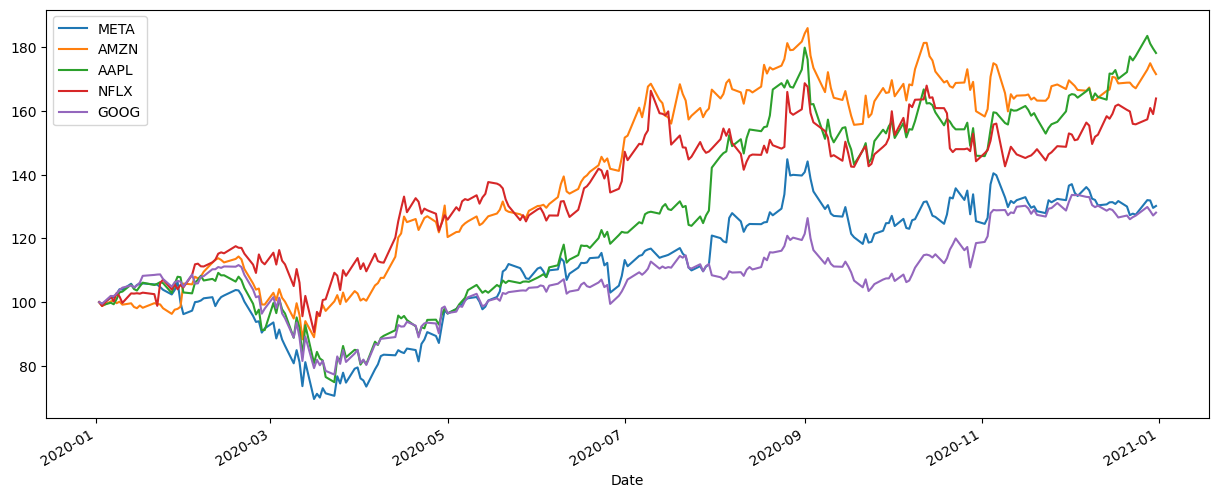

In [25]:
save_to_csv_from_yahoo("AMZN", 2020, 1, 1, 2021, 1, 1)

AMZN = get_df_from_csv("AMZN")

add_daily_return_to_df(AMZN, "AMZN")

AMZN

total_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2021, 1, 1)
print("Total Return:", total_ret)

# mplfinance_plot("AMZN", "ohlc", 2020, 1, 1, 2021, 1, 1)

# price_plot("AMZN", 2020, 1, 1, 2021, 1, 1)

tickers = ["META", "AMZN", "AAPL", "NFLX", "GOOG"]
# download_multiple_stocks(2020, 1, 1, 2021, 1, 1, *tickers)

mult_df = merge_df_by_column_name("Adj Close", 2020, 1, 1, 2021, 1, 1, *tickers)
plot_return_mult_stocks(100, mult_df)

get_mult_stock_mean_sd(mult_df)
mult_df